<img src="https://nserc-hi-am.ca/2020/wp-content/uploads/sites/18/2019/12/McGill.png" width="500" height="400" align="center">

# Group Project
#### Arnaud Guzman-Annès | ID: 260882529
#### Ram Babu | ID: 260958970
#### Sophie Courtemanche-Martel | ID: XXXXXXX
#### Duncan Wang | ID: XXXXXXX
#### Jules Zielinski | ID: XXXXXXX
<br><br>
**Date: February 22nd, 2021**
<br><br>
## Objective:

TED talks are video recordings of influential talks given at and hosted by TED Conferences LLC. TED was founded in 1984, and has since built a reputation for spreading inspiring powerful ideas in fields ranging from tech to science to education, with its videos having garnered over 1 billion views to date.

The goal of this project is to use various features associated with TED talks -- such as the topic, speaker, conference year, and length of the talk -- to predict the number of views a TED talk may receive.


# Data preprocessing

## Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed as well as Scikit-Learn (V ≥0.20).

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Get the data

### About the dataset

### XXX

In [20]:
import pandas as pd
import requests
import io
    
# Downloading the csv file from my GitHub account
url = "https://raw.githubusercontent.com/McGill-MMA-EnterpriseAnalytics/TED/main/data/ted_main.csv"

download = requests.get(url).content

# Reading the downloaded content and turning it into a pandas dataframe
# We will use "churn" instead of "df" for replication purposes
df = pd.read_csv(io.StringIO(download.decode('utf-8')))

# Printing out the first 5 rows of the dataframe
df.head()

comments                                        description  duration  \
0      4553  Sir Ken Robinson makes an entertaining and pro...      1164   
1       265  With the same humor and humanity he exuded in ...       977   
2       124  New York Times columnist David Pogue takes aim...      1286   
3       200  In an emotionally charged talk, MacArthur-winn...      1116   
4       593  You've never seen data presented like this. Wi...      1190   

     event   film_date  languages   main_speaker  \
0  TED2006  1140825600         60   Ken Robinson   
1  TED2006  1140825600         43        Al Gore   
2  TED2006  1140739200         26    David Pogue   
3  TED2006  1140912000         35  Majora Carter   
4  TED2006  1140566400         48   Hans Rosling   

                                            name  num_speaker  published_date  \
0      Ken Robinson: Do schools kill creativity?            1      1151367060   
1           Al Gore: Averting the climate crisis            1      1151367060   
2                  David Pogue: Simplicity sells            1      1151367060   
3             Majora Carter: Greening the ghetto            1      1151367060   
4  Hans Rosling: The best stats you've ever seen            1      1151440680   

                                             ratings  \
0  [{'id': 7, 'name': 'Funny', 'count': 19645}, {...   
1  [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...   
2  [{'id': 7, 'name': 'Funny', 'count': 964}, {'i...   
3  [{'id': 3, 'name': 'Courageous', 'count': 760}...   
4  [{'id': 9, 'name': 'Ingenious', 'count': 3202}...   

                                       related_talks  \
0  [{'id': 865, 'hero': 'https://pe.tedcdn.com/im...   
1  [{'id': 243, 'hero': 'https://pe.tedcdn.com/im...   
2  [{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...   
3  [{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...   
4  [{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...   

                     speaker_occupation  \
0                       Author/educator   
1                      Climate advocate   
2                  Technology columnist   
3    Activist for environmental justice   
4  Global health expert; data visionary   

                                                tags  \
0  ['children', 'creativity', 'culture', 'dance',...   
1  ['alternative energy', 'cars', 'climate change...   
2  ['computers', 'entertainment', 'interface desi...   
3  ['MacArthur grant', 'activism', 'business', 'c...   
4  ['Africa', 'Asia', 'Google', 'demo', 'economic...   

                             title  \
0      Do schools kill creativity?   
1      Averting the climate crisis   
2                 Simplicity sells   
3              Greening the ghetto   
4  The best stats you've ever seen   

                                                 url     views  
0  https://www.ted.com/talks/ken_robinson_says_sc...  47227110  
1  https://www.ted.com/talks/al_gore_on_averting_...   3200520  
2  https://www.ted.com/talks/david_pogue_says_sim...   1636292  
3  https://www.ted.com/talks/majora_carter_s_tale...   1697550  
4  https://www.ted.com/talks/hans_rosling_shows_t...  12005869

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   comments            2550 non-null   int64 
 1   description         2550 non-null   object
 2   duration            2550 non-null   int64 
 3   event               2550 non-null   object
 4   film_date           2550 non-null   int64 
 5   languages           2550 non-null   int64 
 6   main_speaker        2550 non-null   object
 7   name                2550 non-null   object
 8   num_speaker         2550 non-null   int64 
 9   published_date      2550 non-null   int64 
 10  ratings             2550 non-null   object
 11  related_talks       2550 non-null   object
 12  speaker_occupation  2544 non-null   object
 13  tags                2550 non-null   object
 14  title               2550 non-null   object
 15  url                 2550 non-null   object
 16  views               2550

In [4]:
df.describe()

comments     duration     film_date    languages  num_speaker  \
count  2550.000000  2550.000000  2.550000e+03  2550.000000  2550.000000   
mean    191.562353   826.510196  1.321928e+09    27.326275     1.028235   
std     282.315223   374.009138  1.197391e+08     9.563452     0.207705   
min       2.000000   135.000000  7.464960e+07     0.000000     1.000000   
25%      63.000000   577.000000  1.257466e+09    23.000000     1.000000   
50%     118.000000   848.000000  1.333238e+09    28.000000     1.000000   
75%     221.750000  1046.750000  1.412964e+09    33.000000     1.000000   
max    6404.000000  5256.000000  1.503792e+09    72.000000     5.000000   

       published_date         views  
count    2.550000e+03  2.550000e+03  
mean     1.343525e+09  1.698297e+06  
std      9.464009e+07  2.498479e+06  
min      1.151367e+09  5.044300e+04  
25%      1.268463e+09  7.557928e+05  
50%      1.340935e+09  1.124524e+06  
75%      1.423432e+09  1.700760e+06  
max      1.506092e+09  4.722711e+07

In [7]:
df['ratings'][1]

"[{'id': 7, 'name': 'Funny', 'count': 544}, {'id': 3, 'name': 'Courageous', 'count': 139}, {'id': 2, 'name': 'Confusing', 'count': 62}, {'id': 1, 'name': 'Beautiful', 'count': 58}, {'id': 21, 'name': 'Unconvincing', 'count': 258}, {'id': 11, 'name': 'Longwinded', 'count': 113}, {'id': 8, 'name': 'Informative', 'count': 443}, {'id': 10, 'name': 'Inspiring', 'count': 413}, {'id': 22, 'name': 'Fascinating', 'count': 132}, {'id': 9, 'name': 'Ingenious', 'count': 56}, {'id': 24, 'name': 'Persuasive', 'count': 268}, {'id': 23, 'name': 'Jaw-dropping', 'count': 116}, {'id': 26, 'name': 'Obnoxious', 'count': 131}, {'id': 25, 'name': 'OK', 'count': 203}]"

In [8]:
import pandas_profiling
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title='Pandas Profiling Report', html={'style':{'full_width':True}})
profile

Summarize dataset:   0%|          | 0/30 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [22]:
#Converting timestamps to date format
import datetime

df['film_date'] = df['film_date'].apply(lambda x: datetime.datetime.fromtimestamp(int(x)).strftime('%d-%m-%Y'))
df['published_date'] = df['published_date'].apply(lambda x: datetime.datetime.fromtimestamp(int(x)).strftime('%d-%m-%Y'))

In [24]:
df.head()

comments                                        description  duration  \
0      4553  Sir Ken Robinson makes an entertaining and pro...      1164   
1       265  With the same humor and humanity he exuded in ...       977   
2       124  New York Times columnist David Pogue takes aim...      1286   
3       200  In an emotionally charged talk, MacArthur-winn...      1116   
4       593  You've never seen data presented like this. Wi...      1190   

     event   film_date  languages   main_speaker  \
0  TED2006  24-02-2006         60   Ken Robinson   
1  TED2006  24-02-2006         43        Al Gore   
2  TED2006  23-02-2006         26    David Pogue   
3  TED2006  25-02-2006         35  Majora Carter   
4  TED2006  21-02-2006         48   Hans Rosling   

                                            name  num_speaker published_date  \
0      Ken Robinson: Do schools kill creativity?            1     26-06-2006   
1           Al Gore: Averting the climate crisis            1     26-06-2006   
2                  David Pogue: Simplicity sells            1     26-06-2006   
3             Majora Carter: Greening the ghetto            1     26-06-2006   
4  Hans Rosling: The best stats you've ever seen            1     27-06-2006   

                                             ratings  \
0  [{'id': 7, 'name': 'Funny', 'count': 19645}, {...   
1  [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...   
2  [{'id': 7, 'name': 'Funny', 'count': 964}, {'i...   
3  [{'id': 3, 'name': 'Courageous', 'count': 760}...   
4  [{'id': 9, 'name': 'Ingenious', 'count': 3202}...   

                                       related_talks  \
0  [{'id': 865, 'hero': 'https://pe.tedcdn.com/im...   
1  [{'id': 243, 'hero': 'https://pe.tedcdn.com/im...   
2  [{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...   
3  [{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...   
4  [{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...   

                     speaker_occupation  \
0                       Author/educator   
1                      Climate advocate   
2                  Technology columnist   
3    Activist for environmental justice   
4  Global health expert; data visionary   

                                                tags  \
0  ['children', 'creativity', 'culture', 'dance',...   
1  ['alternative energy', 'cars', 'climate change...   
2  ['computers', 'entertainment', 'interface desi...   
3  ['MacArthur grant', 'activism', 'business', 'c...   
4  ['Africa', 'Asia', 'Google', 'demo', 'economic...   

                             title  \
0      Do schools kill creativity?   
1      Averting the climate crisis   
2                 Simplicity sells   
3              Greening the ghetto   
4  The best stats you've ever seen   

                                                 url     views  
0  https://www.ted.com/talks/ken_robinson_says_sc...  47227110  
1  https://www.ted.com/talks/al_gore_on_averting_...   3200520  
2  https://www.ted.com/talks/david_pogue_says_sim...   1636292  
3  https://www.ted.com/talks/majora_carter_s_tale...   1697550  
4  https://www.ted.com/talks/hans_rosling_shows_t...  12005869

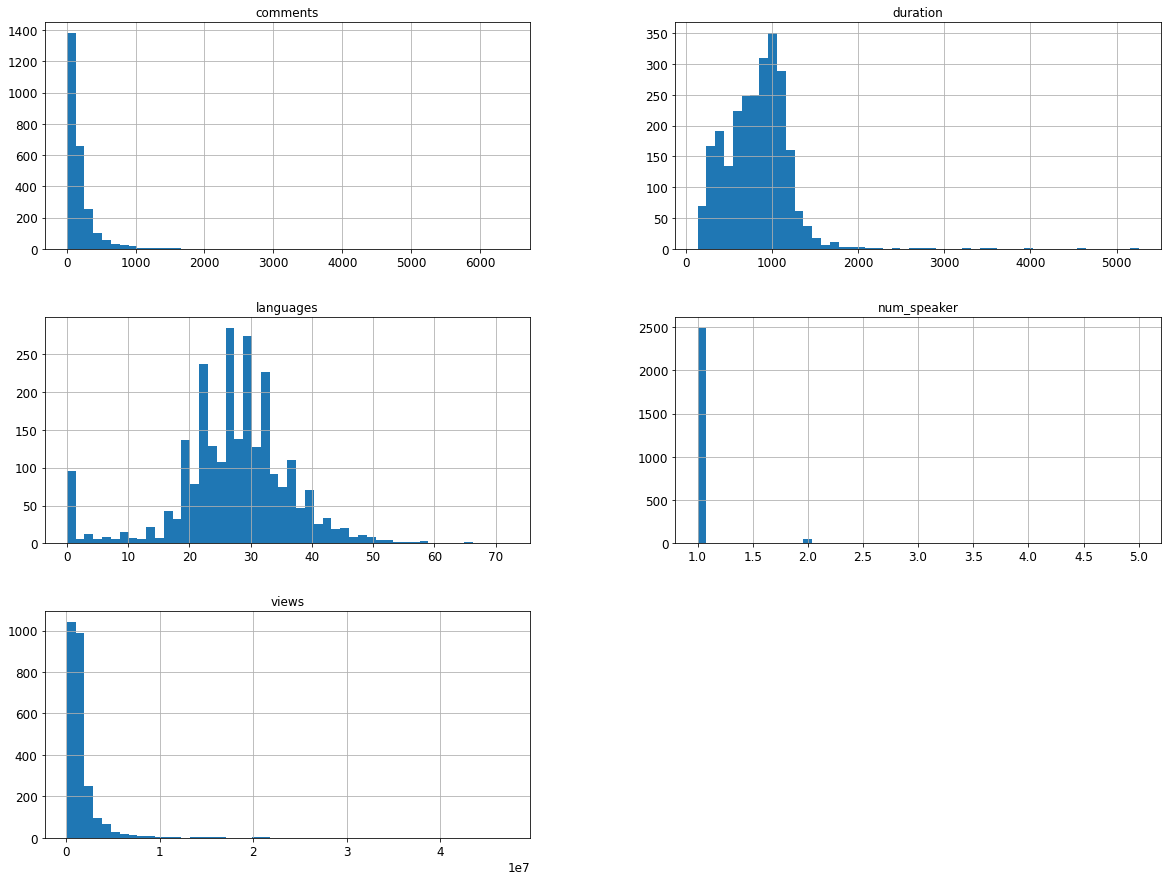

In [11]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [74]:
df_copy = df.copy()

In [75]:
#Filtering out the TED talks
df_copy = df_copy[df_copy['event'].str.contains('TED', regex=False, case=False, na=False)]
df_copy.shape

(2439, 17)

In [76]:
df_copy=df_copy.drop(["description","url"],axis=1)

In [77]:
#Converting Duration to minutes
df_copy["duration"]=round(df_copy["duration"]/60,2)

In [87]:
#Missing values
pd.isnull(df_copy).sum()

In [ ]:
df_copy.fillna('Unknown', inplace = True)

In [89]:
pd.isnull(df_copy).sum()

comments              0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
name                  0
num_speaker           0
published_date        0
ratings               0
related_talks         0
speaker_occupation    0
tags                  0
title                 0
views                 0
dtype: int64

In [92]:
df_copy['languages'].describe()

count    2439.000000
mean       27.703977
std         9.205526
min         0.000000
25%        23.000000
50%        28.000000
75%        33.000000
max        72.000000
Name: languages, dtype: float64

Observations with zero languages are musicals

In [93]:
df_copy[df_copy['languages']==0]

comments  duration                         event   film_date  languages  \
58         222     13.75                       TED2005  24-02-2005          0   
115         27      3.57                       TED2006  01-02-2006          0   
135         36      4.98                TEDGlobal 2007  07-06-2007          0   
209         67      6.98                TEDGlobal 2007  05-06-2007          0   
237         43      6.43                TEDGlobal 2007  05-06-2007          0   
249         50      3.10                       TED2008  11-02-2008          0   
399        194     10.60                       TED2009  05-02-2009          0   
446        138      4.90                       TED2009  04-02-2009          0   
474        135      3.08                       TEDxUSC  22-03-2009          0   
512        146     13.57                       TED2006  08-02-2006          0   
547         46      2.35                TEDGlobal 2009  22-07-2009          0   
599        104     16.67                 TEDIndia 2009  05-11-2009          0   
696         85     23.07                TEDGlobal 2009  22-07-2009          0   
1053        46     16.88              TEDxThessaloniki  01-04-2011          0   
1060       254     15.55                 TEDxSantaCruz  01-03-2011          0   
1061       118     16.37                  TEDxWaterloo  02-03-2011          0   
1067       240     16.30             TEDxKids@Brussels  31-05-2011          0   
1068       223     12.82                      TEDxTeen  01-04-2011          0   
1079        84     11.43              TEDxBoulder 2011  23-09-2011          0   
1086        75      8.47                    TEDxVienna  03-10-2011          0   
1087       138     13.00                       TEDxYYC  31-03-2011          0   
1094       119     18.08                  TEDxCanberra  23-09-2011          0   
1104        70     10.53                        TEDxTC  12-10-2010          0   
1105        41      9.68               TEDxBoston 2011  27-06-2011          0   
1111       325      9.98                       TEDxYYC  31-03-2011          0   
1112        43     13.60                  TEDxBrussels  21-11-2011          0   
1118       195      9.72                       TEDxMIA  12-09-2011          0   
1125       104     22.25                      TEDxEast  08-05-2011          0   
1133        80      9.90        TEDxSanMigueldeAllende  05-08-2011          0   
1134       245     18.17                      TEDxEast  10-11-2011          0   
1141        70     18.63                     TEDxIslay  22-04-2011          0   
1144        15      3.32  TEDxGreatPacificGarbagePatch  05-11-2010          0   
1149        80     11.15                   TEDxPhoenix  10-11-2011          0   
1156        90     20.90                 TEDxAsheville  12-11-2011          0   
1169       123     15.88                   TEDxPhoenix  10-11-2011          0   
1171       152      6.27                        TED-Ed  16-11-2011          0   
1172       428     12.13                        TED-Ed  11-03-2012          0   
1173        62      8.47                        TED-Ed  11-03-2012          0   
1174       145      7.53                        TED-Ed  01-11-2011          0   
1178        84     11.05                 TEDxCambridge  18-11-2011          0   
1179        99     19.85               TEDxPortofSpain  10-11-2011          0   
1184        59     17.37                 TEDxVancouver  11-11-2011          0   
1191        86      5.63                TEDxPittsburgh  18-11-2011          0   
1193        76      6.03                        TED-Ed  01-04-2012          0   
1198       175      5.08                        TED-Ed  10-11-2011          0   
1212       224      5.47                        TED-Ed  24-04-2012          0   
1223        59     18.07                   TEDxPhoenix  10-11-2011          0   
1229        73     12.82                       TEDxSMU  02-12-2011          0   
1237        67     11.62             

In [95]:
#Indexing the rows
df_copy.reset_index(inplace=True)

In [106]:
from collections import defaultdict
rating_data = defaultdict(list)

In [109]:
import ast
rating_names = set()
for index, row in df_copy.iterrows():
    rating = ast.literal_eval(row['ratings'])
    for item in rating:
        rating_names.add(item['name'])

In [110]:
rating_names

{'Beautiful',
 'Confusing',
 'Courageous',
 'Fascinating',
 'Funny',
 'Informative',
 'Ingenious',
 'Inspiring',
 'Jaw-dropping',
 'Longwinded',
 'OK',
 'Obnoxious',
 'Persuasive',
 'Unconvincing'}

In [111]:
#Extracting ratings

rating_data = defaultdict(list)
for index, row in df_copy.iterrows():
    rating = ast.literal_eval(row['ratings'])
    rating_data['ID'].append(row['index'])
    names = set()
    for item in rating:
        rating_data[item['name']].append(item['count'])
        names.add(item['name'])

rating_data = pd.DataFrame(rating_data)

rating_data.head()

ID  Funny  Beautiful  Ingenious  Courageous  Longwinded  Confusing  \
0   0  19645       4573       6073        3253         387        242   
1   1    544         58         56         139         113         62   
2   2    964         60        183          45          78         27   
3   3     59        291        105         760          53         32   
4   4   1390        942       3202         318         110         72   

   Informative  Fascinating  Unconvincing  Persuasive  Jaw-dropping    OK  \
0         7346        10581           300       10704          4439  1174   
1          443          132           258         268           116   203   
2          395          166           104         230            54   146   
3          380          132            36         460           230    85   
4         5433         4606            67        2542          3736   248   

   Obnoxious  Inspiring  
0        209      24924  
1        131        413  
2        142        230  
3         35       1070  
4         61       2893

In [113]:
#Extracting tags

tags_data = defaultdict(list)
for index, row in df_copy.iterrows():
    tags = ast.literal_eval(row['tags'])
    for item in tags:
        tags_data['ID'].append(row['index'])
        tags_data['tags'].append(item)

tags_data = pd.DataFrame(tags_data)

In [116]:
tags_data[tags_data['ID']==1]

ID                tags
7    1  alternative energy
8    1                cars
9    1      climate change
10   1             culture
11   1         environment
12   1       global issues
13   1             science
14   1      sustainability
15   1          technology

In [143]:
#Extracting related talks

df_copy['related_views'] = 0
df_copy['related_duration'] = 0
for index, row in df_copy.iterrows():
    rel = row['related_talks'].split(',')
    ctr1 = 0
    tot1 = 0
    ctr2 = 0
    tot2 = 0
    for views in rel:
        if 'viewed_count' in views:
            view = views.split(':')
            view[1] = view[1].replace("]", "")
            view[1] = view[1].replace(" ", "")
            view[1] = view[1].replace("}", "")
            tot1+=int(view[1])
            ctr1+=1
        if 'duration' in views:
            view = views.split(':')
            view[1] = view[1].replace("]", "")
            view[1] = view[1].replace(" ", "")
            view[1] = view[1].replace("}", "")
            tot2+=int(view[1])
            ctr2+=1
    df_copy['related_views'][index] = tot1/ctr1
    df_copy['related_duration'][index] = tot2/ctr2

<ipython-input-143-3e2c6d04c718>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['related_views'][index] = tot1/ctr1
<ipython-input-143-3e2c6d04c718>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['related_duration'][index] = tot2/ctr2


In [144]:
df_copy.head()

index  comments  duration    event   film_date  languages   main_speaker  \
0      0      4553     19.40  TED2006  24-02-2006         60   Ken Robinson   
1      1       265     16.28  TED2006  24-02-2006         43        Al Gore   
2      2       124     21.43  TED2006  23-02-2006         26    David Pogue   
3      3       200     18.60  TED2006  25-02-2006         35  Majora Carter   
4      4       593     19.83  TED2006  21-02-2006         48   Hans Rosling   

                                            name  num_speaker published_date  \
0      Ken Robinson: Do schools kill creativity?            1     26-06-2006   
1           Al Gore: Averting the climate crisis            1     26-06-2006   
2                  David Pogue: Simplicity sells            1     26-06-2006   
3             Majora Carter: Greening the ghetto            1     26-06-2006   
4  Hans Rosling: The best stats you've ever seen            1     27-06-2006   

                                             ratings  \
0  [{'id': 7, 'name': 'Funny', 'count': 19645}, {...   
1  [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...   
2  [{'id': 7, 'name': 'Funny', 'count': 964}, {'i...   
3  [{'id': 3, 'name': 'Courageous', 'count': 760}...   
4  [{'id': 9, 'name': 'Ingenious', 'count': 3202}...   

                                       related_talks  \
0  [{"id": 865, "hero": "https://pe.tedcdn.com/im...   
1  [{"id": 243, "hero": "https://pe.tedcdn.com/im...   
2  [{"id": 1725, "hero": "https://pe.tedcdn.com/i...   
3  [{"id": 1041, "hero": "https://pe.tedcdn.com/i...   
4  [{"id": 2056, "hero": "https://pe.tedcdn.com/i...   

                     speaker_occupation  \
0                       Author/educator   
1                      Climate advocate   
2                  Technology columnist   
3    Activist for environmental justice   
4  Global health expert; data visionary   

                                                tags  \
0  ['children', 'creativity', 'culture', 'dance',...   
1  ['alternative energy', 'cars', 'climate change...   
2  ['computers', 'entertainment', 'interface desi...   
3  ['MacArthur grant', 'activism', 'business', 'c...   
4  ['Africa', 'Asia', 'Google', 'demo', 'economic...   

                             title     views  related_views  related_duration  
0      Do schools kill creativity?  47227110        3027062               921  
1      Averting the climate crisis   3200520        1118767              1096  
2                 Simplicity sells   1636292        1846195               915  
3              Greening the ghetto   1697550         776189               748  
4  The best stats you've ever seen  12005869        1907337               943

# Data Visualizations

In [14]:
train_copy = train_set.copy()

Plotting all numerical attributes in the dataset

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021FEEBF2040>,
      dtype=object)

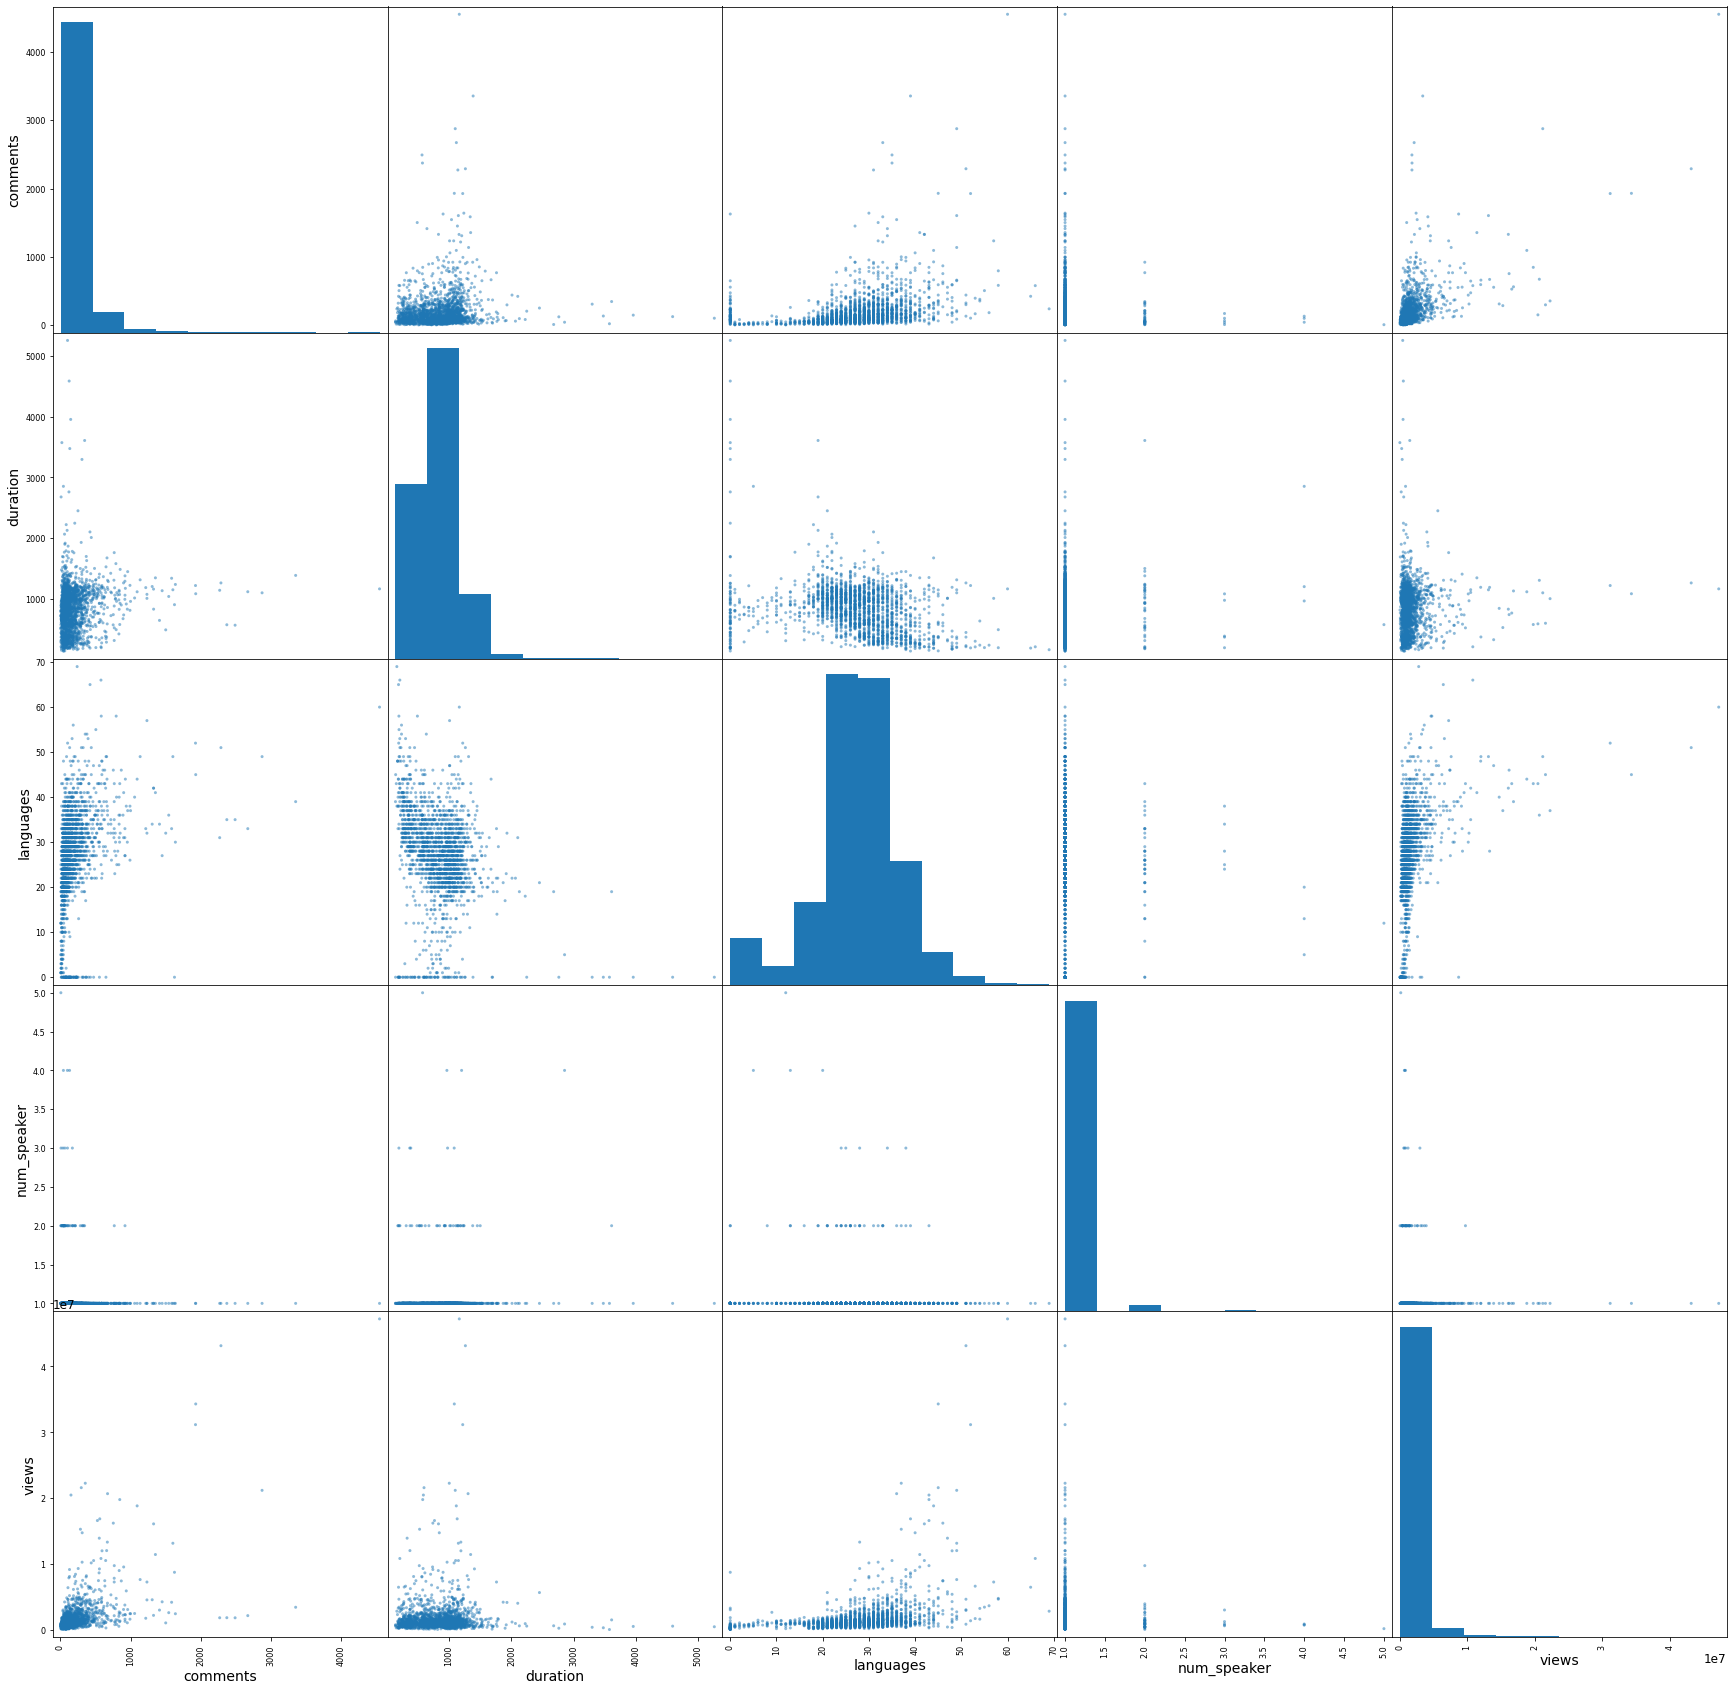

In [17]:
from pandas.plotting import scatter_matrix

attributes = ["comments","duration","languages","num_speaker","views"]
scatter_matrix(train_copy[attributes], figsize=(30,30))